In [ ]:
import os
import sys
sys.path.append("..")

import sqlite3
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt

In [7]:
sqlite_path = Path("/Users/tom/projects/clip-index/assets/clip_image.db")
index_folder = Path("/Volumes/T7/CLIP-indexes/motis-128/val/")

In [8]:
from clip_index.imagenet import ImagenetDETDataset

imagenet_root = Path("/Volumes/T7/ILSVRC/")
imagenet_synset = Path("../assets/imagenet_synset_det.txt")
dataset = ImagenetDETDataset(imagenet_root, imagenet_synset)


In [9]:
# Create sqlite DB
# schema_path = Path().resolve().parent / "config/schema.sql"
# !sqlite3 {sqlite_path} < {schema_path}

In [10]:
assert sqlite_path.exists()
conn = sqlite3.connect(sqlite_path)
cur = conn.cursor()

In [11]:
# Build indexes
# from clip_index.config import BuildCfg
# from clip_index.build import build_indexes_from_imgs

# image_dir = Path("/Volumes/T7/ILSVRC/Data/DET/val")
# bcfg = BuildCfg(index_size=128)
# model = bcfg.load_model()

# build_indexes_from_imgs(model, image_dir, index_folder, conn, bcfg)

In [12]:
# Experiment with query engineering
query_prefix = ""
queries = [query_prefix + cls for cls in dataset._synset2desc.values()]
# Remove query_prefix from queries
# annoy_queries = dict(map(lambda q: (q[0].replace(query_prefix, ''), q[1]), annoy_queries.items()))

In [1]:
# Query indexes
# Plurals
from clip_index import QueryCfg
from clip_index import query_index, filter_closest_n_results
from clip_index.stats import annoy_query_stats, QueryStats

max_thres = 1.25
qcfg = QueryCfg(threshold=max_thres)
queries = ["zebra"]
annoy_queries = query_index(index_folder, queries, cur, qcfg)
dataset.add_imagenet_classes(annoy_queries)

ModuleNotFoundError: No module named 'clip_index'

In [150]:
best_idx = thres_stats.mean(0).argmax().item()
best_threshold = thresholds[best_idx].item()
print("The best threshold is:", round(best_threshold, 3))

The best threshold is: 1.1


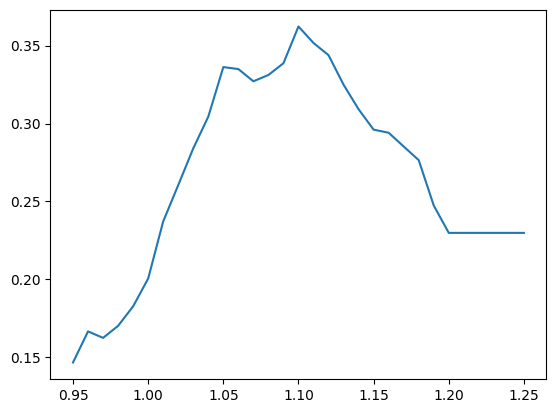

In [151]:
ys = thres_stats.mean(0)
# Second peak from divide by zero errors giving 1
plt.plot(thresholds, ys);

In [ ]:
n = 5

# thres_maxes = thres_stats.max(1).values
# best_qs = thres_maxes[thres_maxes != 1].topk(n)
# worst_qs = (thres_maxes * -1).topk(n)

thres_values = thres_stats[:, best_idx]
best_qs = thres_values[thres_values != 1].topk(n)
worst_qs = thres_values.topk(n)

best_thres = 1.1

print(f"Top {n} best performing queries")
for i, f1 in zip(best_qs.indices, best_qs.values):
    print("%s %.2f" % (queries[i], f1.item()))

    ##### WHY AM I GETTING DIFFERNT RESULTS THAN ABOVE
    q = queries[i]
    imgs = annoy_queries[q]
    fimgs = filter(lambda x: x.dist < best_thres, imgs)
    qstat = annoy_query_stats(q, fimgs, total_each_class[q], total_dataset)
    print("correct: %d, incorrect %d, not found %d" % (qstat.tp, qstat.fp, qstat.fn))
    print(qstat.format_stats())
    print()

print(f"Top {n} worst performing queries")
for i, f1 in zip(worst_qs.indices, worst_qs.values):
    print("%s %.2f" % (queries[i], -f1.item()))
    q = queries[i]
    imgs = annoy_queries[q]
    fimgs = filter(lambda x: x.dist < best_thres, imgs)
    qstat = annoy_query_stats(q, fimgs, total_each_class[q], total_dataset)
    print("correct: %d, incorrect %d, not found %d" % (qstat.tp, qstat.fp, qstat.fn))
    print(qstat.format_stats())
    print()


In [ ]:
total_each_class = dataset.total_each_class("val")
total_dataset = dataset.get_num_images("val")

import torch
thresholds = torch.arange(0.95, 1.25, 0.01)

thres_stats = torch.empty(len(annoy_queries), len(thresholds))
for i, (q, imgs) in enumerate(annoy_queries.items()):
    for j, thres in enumerate(thresholds):
        thres_imgs = filter(lambda x: x.dist < thres, imgs)
        qstats = annoy_query_stats(q, thres_imgs, total_each_class[q], total_dataset)
        f1 = qstats.f1()
        thres_stats[i, j] = f1

NameError: name 'annoy_queries' is not defined

In [ ]:
# filter_closest_n_results(annoy_queries, 100)
# Remove queries with no results
# annoy_queries = dict(filter(lambda q: q[1] != [], annoy_queries.items()))

In [7]:
# from clip_index import show_queries
# show_queries(annoy_queries)
# pass # Otherwise it'll show twice

In [9]:
    
    ### Thing is, lot of these images are mislabeled!
#     if incorrect_clss:
        # Incorrect classes can be empty for images with no tags
#         for path, clss, dist in incorrect_clss:
#             print(path)
#             plt.figure()
#             plt.imshow(Image.open(path))
#             plt.title("%s - %.4f" % (clss, dist))
#             plt.axis('off')
#         pass
    print()

zebra
accuracy: 0.9993, precision: 0.7931, recall: 0.7188, f1: 0.7541



In [ ]:
zebra_files = ['/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00014584.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00046413.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00033660.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00035763.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00032022.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2013_val_00003883.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00018423.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00012974.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00009159.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2013_val_00002872.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00017212.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00012340.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00015166.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00048670.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00005604.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00037475.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00023212.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00035101.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00037886.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00024175.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00006129.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00004267.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00037130.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00030688.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00029124.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00043935.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00002996.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00009633.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2013_val_00003050.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00042330.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00015124.JPEG', '/Volumes/T7/ILSVRC/Data/DET/val/ILSVRC2012_val_00047305.JPEG']
for z in zebra_files:
    plt.figure()
    plt.imshow(Image.open(z))
    plt.axis('off')
    clss = dataset.get_classes_from_image_path(Path(z))
    plt.title(clss)


In [ ]:
def normally_distributed_thresholds(start, end, mean, std, epsilon=0.0005):
    def normal_step_size(x):
        return abs((x - mean)/std) + epsilon
    xs = []
    cur = start
    while cur < end:
        xs.append(cur)
        cur += normal_step_size(cur)
    return xs

    
mean = 1.08
std = 3
start = 0.96
end = 1.2

norm_xs = normally_distributed_thresholds(start, end, mean, std)
ys = range(len(xs))
plt.plot(xs, ys);